<a href="https://colab.research.google.com/github/VItor-Ace/VItor-Ace/blob/main/Final_Project_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#URL = 'https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv'
URL = 'https://drive.usercontent.google.com/download?id=1A19BBwzUBEcxLGFWzoi8YrhbiKc9rgdw&export=download&confirm=t&uuid=7f62e0ce-a208-41bd-8f14-2cf6a173fdc9'
r = requests.get(URL, allow_redirects=True)
file_name = URL.split('/')[-1]
with open(file_name, 'wb') as f:
    f.write(r.content)
os.rename(file_name, 'CFEM_Arrecadacao.csv')

# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo.
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica.
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    with open(filename, 'r', encoding='ISO-8859-1') as file:

        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes:
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
            dados[-1][-3] = dados[-1][-3].replace(',','.')
            dados[-1][-1] = dados[-1][-1].replace(',','.')

    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)

    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("CFEM_Arrecadacao.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))
print()

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

#print(dados[0][0], "\n\n")

['Ano', 'Mês', 'Processo', 'AnoDoProcesso', 'Tipo_PF_PJ', 'CPF_CNPJ', 'Substância', 'UF', 'Município', 'QuantidadeComercializada', 'UnidadeDeMedida', 'ValorRecolhido'] 

['2002', '8', '910262', '2007', 'PJ', '88503388000194', 'BASALTO', 'RS', 'TRÊS DE MAIO', '0', 'm3 ', '206.41']
Número total de registros: 2007476

{'Ano': 0, 'Mês': 1, 'Processo': 2, 'AnoDoProcesso': 3, 'Tipo_PF_PJ': 4, 'CPF_CNPJ': 5, 'Substância': 6, 'UF': 7, 'Município': 8, 'QuantidadeComercializada': 9, 'UnidadeDeMedida': 10, 'ValorRecolhido': 11}


['Ano', 'Mês', 'Processo', 'AnoDoProcesso', 'Tipo_PF_PJ', 'CPF_CNPJ', 'Substância', 'UF', 'Município', 'QuantidadeComercializada', 'UnidadeDeMedida', 'ValorRecolhido']

['2002', '8', '910262', '2007', 'PJ', '88503388000194', 'BASALTO', 'RS', 'TRÊS DE MAIO', '0', 'm3 ', '206.41']
Número total de registros: 2007476

{'Ano': 0, 'Mês': 1, 'Processo': 2, 'AnoDoProcesso': 3, 'Tipo_PF_PJ': 4, 'CPF_CNPJ': 5, 'Substância': 6, 'UF': 7, 'Município': 8, 'QuantidadeComercializada': 9, 'UnidadeDeMedida': 10, 'ValorRecolhido': 11}

Tarefa 1 - Evolução da arrecadação ao longo dos anos - (2 pontos)
---------

**Agora é com você!**

Implemente funções para gerar um gráfico com o valor recolhido do CFEM no estado de Minas Gerais ao longo dos anos (2004 a 2024 em milhões de reais).

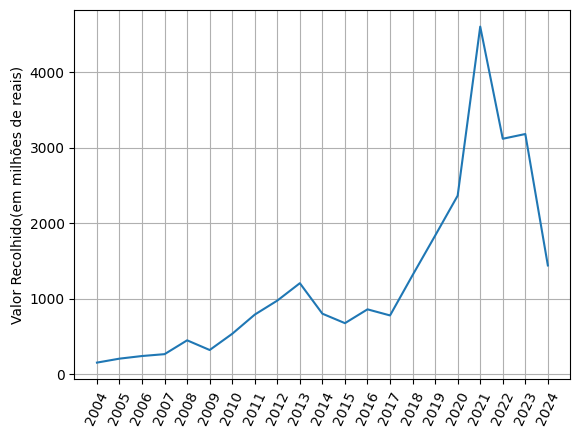

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


dados_MG = []

def State_Verification(State, Empty_List):
  for line in range(len(dados)):
    if dados[line][7] == State:
      Empty_List.append(dados[line])

  return Empty_List

dados_MG = State_Verification('MG', dados_MG)

"""for index in range(len(dados)):
  if (dados[index][7]) == 'MG':
    dados_MG.append(dados[index])"""

#print(dados_MG[0])
#print(len(dados_MG))

ValorRecolhido_MG = np.array([], dtype=np.float64)
Anos = list(range(2004, 2025))

def Valor_Recolhido(Year_List, Empty_Array, Data_List):
  for ano in range(len(Year_List)):
    Soma_VR = 0.00
    for line in range(len(Data_List)):
      if int(Data_List[line][0]) == int(Year_List[ano]):
        Soma_VR += float(Data_List[line][11])
    Empty_Array = np.append(Empty_Array, Soma_VR)

  return Empty_Array

ValorRecolhido_MG = Valor_Recolhido(Anos, ValorRecolhido_MG, dados_MG)

"""for ano in range(len(Anos)):
  Soma_VR = 0.00
  for index in range(len(dados_MG)):
    if int(dados_MG[index][0]) == int(Anos[ano]):
      Soma_VR += float(dados_MG[index][11])
  #print(Soma_VR)
  ValorRecolhido_MG = np.append(ValorRecolhido_MG, Soma_VR)"""

#print(ValorRecolhido_MG)

#print(len(ValorRecolhido_MG))
#print(len(Anos))

ValorRecolhido_MG_Milhoes = np.divide(ValorRecolhido_MG, 1000000)

#print(ValorRecolhido_MG_Milhoes)
#print(ValorRecolhido_MG_Milhoes[0])

items = len(ValorRecolhido_MG_Milhoes)

#print(len(ValorRecolhido_MG_Milhoes))
#print(len(Anos))

def Plotting_Graph(min_year, max_year, Data_Array):
  x = np.arange(min_year, (max_year + 1), 1)
  y = np.array([])
  plt.xticks(x)
  for items in range(len(Data_Array)):
    y = np.append(y, float(Data_Array[items]))

  return plt.plot(x, y)

Plotting_Graph(2004, 2024, ValorRecolhido_MG_Milhoes)

#x = np.arange(2004, 2025, 1)
#y = np.array([])

plt.xticks(rotation=65)

"""for index in range(items):
  y = np.append(y, float(ValorRecolhido_MG_Milhoes[index]))

plt.plot(x, y)"""

plt.ylabel("Valor Recolhido(em milhões de reais)")

plt.grid(True)

plt.show()

Tarefa 2 - Extração de ferro por estado entre 2014 e 2024 - (2 pontos)
---------

Implemente funções para plotar um gráfico de barras que mostra a extração de ferro (**'FERRO'**) por estado brasileiro entre os anos de 2014 e 2024.

**Dica 1:** Ferro é representado pela string 'FERRO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('') e se é diferente de 0 (zero).

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

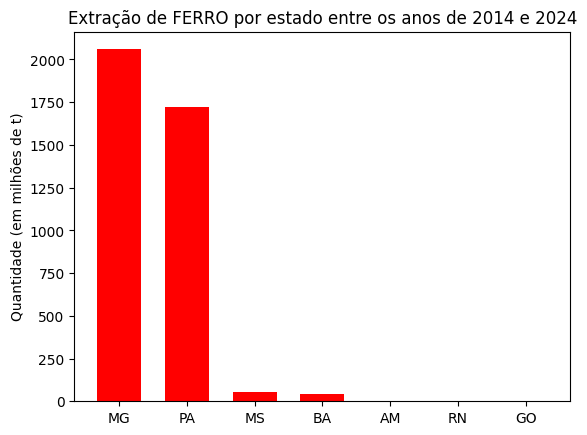

In [ ]:
dados_Ferro = []

def Mineral_Verification(Substance, Empty_List):
  for line in range(len(dados)):
    if dados[line][6] == Substance:
      Empty_List.append(dados[line])

  return Empty_List

dados_Ferro = Mineral_Verification('FERRO', dados_Ferro)

"""for index in range(len(dados)):
   if dados[index][6] == 'FERRO':
    dados_Ferro.append(dados[index])"""

#print(dados_Ferro[0])
#print(len(dados_Ferro))

QtdComerc = np.array([])
Estados = ['MG', 'PA', 'MS', 'BA', 'AM', 'RN', 'GO']

def Data_Implementation(States_List, Empty_Array, Mineral_List, min_year, max_year):
  for number in range(len(States_List)):
    num_QtdComerc = 0.00
    for line in range(len(Mineral_List)):
      if Mineral_List[line][7] == States_List[number]:
        if (Mineral_List[line][9] == '' or Mineral_List[line][9] == '0' or Mineral_List[line][9] == ' ') or (int(Mineral_List[line][0]) < min_year or int(Mineral_List[line][0]) > max_year):
          continue
        else:
          num_QtdComerc += float(Mineral_List[line][9])
    Empty_Array = np.append(Empty_Array, num_QtdComerc)

  return Empty_Array

"""for number in range(len(Estados)):
  num_QtdComerc = 0.00
  for index in range(len(dados_Ferro)):
    if dados_Ferro[index][7] == Estados[number]:
      if (dados_Ferro[index][9] == '' or dados_Ferro[index][9] == '0' or dados_Ferro[index][9] == ' ') or (int(dados_Ferro[index][0]) < 2014):
        continue
      else:
        num_QtdComerc += float(dados_Ferro[index][9])
  QtdComerc = np.append(QtdComerc, num_QtdComerc)"""

QtdComerc = Data_Implementation(Estados, QtdComerc, dados_Ferro, 2014, 2024)

#print(QtdComerc)

QtdComerc_Mi = np.divide(QtdComerc, 1000000)

def Plotting_DataByState(States_List, Data_Array, color):
  for item in range(len(Data_Array)):
    plt.bar(States_List[item], Data_Array[:][item], color=color, width=0.65)

Plotting_DataByState(Estados, QtdComerc_Mi, 'r')

"""for i in range(len(QtdComerc_Mi)):
  plt.bar(Estados[i], QtdComerc_Mi[:][i], color='r', width=0.65)"""

plt.ylabel("Quantidade (em milhões de t)")
plt.title("Extração de FERRO por estado entre os anos de 2014 e 2024")

plt.show()

Tarefa 3 - Extração de ouro por estado nos últimos dez anos - (2 pontos)
---------

Implemente funções para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2013 até 2023) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

**Dica 1:** Ouro é representado pela string 'OURO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

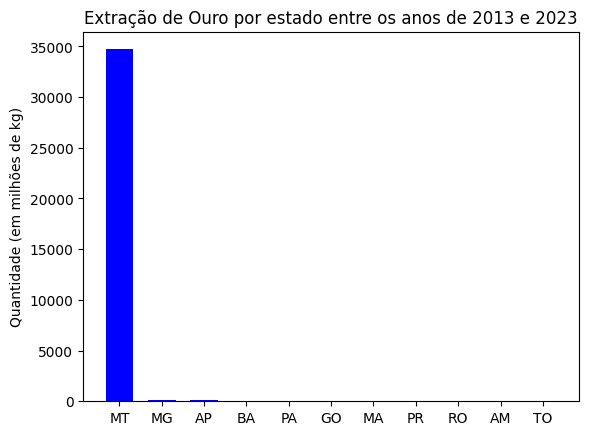

In [ ]:
dados_Ouro = []

dados_Ouro = Mineral_Verification('OURO', dados_Ouro)

QtdComerc_Ouro = np.array([])
Estados1 = ['MT', 'MG', 'AP', 'BA', 'PA', 'GO', 'MA', 'PR', 'RO', 'AM', 'TO']

QtdComerc_Ouro = Data_Implementation(Estados1, QtdComerc_Ouro, dados_Ouro, 2013, 2023)

QtdComerc_Ouro_Mi = np.divide(QtdComerc_Ouro, 1000000)

Plotting_DataByState(Estados1, QtdComerc_Ouro_Mi, 'b')

plt.ylabel("Quantidade (em milhões de kg)")
plt.title("Extração de Ouro por estado entre os anos de 2013 e 2023")

plt.show()

Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará - (2 pontos)
---------

Implemente funções para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 2003 até 2024). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

**Dica 1:** Ferro é representada pela string 'FERRO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

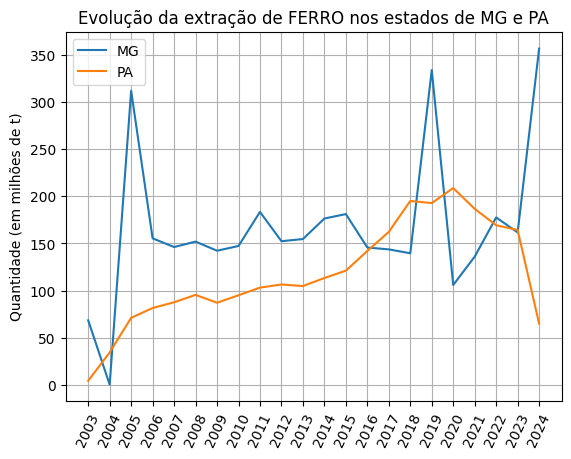

In [ ]:
dados_MG = []
dados_PA = []

dados_MG = State_Verification('MG', dados_MG)
dados_PA = State_Verification('PA', dados_PA)

def Mineral_Verification_By_State(Substance, Empty_List, Data_State):
  for line in range(len(Data_State)):
    if Data_State[line][6] == Substance:
      Empty_List.append(Data_State[line])

  return Empty_List

dados_Ferro_MG = []
dados_Ferro_PA = []

dados_Ferro_MG = Mineral_Verification_By_State('FERRO', dados_Ferro_MG, dados_MG)
dados_Ferro_PA = Mineral_Verification_By_State('FERRO', dados_Ferro_PA, dados_PA)

QtdComerc_MG = np.array([])
QtdComerc_PA = np.array([])

def Quantity_Cormercialized(Empty_Array, Data_List, min_year, max_year):
  Year_List = list(range(min_year, (max_year + 1)))
  for ano in range(len(Year_List)):
    Soma_QC = 0.00
    for line in range(len(Data_List)):
      if (int(Data_List[line][0]) == int(Year_List[ano])):
        if Data_List[line][9] == '' or Data_List[line][9] == '0' or Data_List[line][9] == ' ':
          continue
        else:
          Soma_QC += float(Data_List[line][9])
    Empty_Array = np.append(Empty_Array, Soma_QC)

  return Empty_Array

QtdComerc_MG = Quantity_Cormercialized(QtdComerc_MG, dados_Ferro_MG, 2003, 2024)
QtdComerc_PA = Quantity_Cormercialized(QtdComerc_PA, dados_Ferro_PA, 2003, 2024)

QtdComerc_MG_Milhoes = np.divide(QtdComerc_MG, 1000000)
QtdComerc_PA_Milhoes = np.divide(QtdComerc_PA, 1000000)

def Plotting_Graph(min_year, max_year, Data_Array):
  x = np.arange(min_year, (max_year + 1), 1)
  y = np.array([])
  plt.xticks(x)
  for items in range(len(Data_Array)):
    y = np.append(y, float(Data_Array[items]))

  return plt.plot(x, y)

plot1 = Plotting_Graph(2003, 2024, QtdComerc_MG_Milhoes)
plot2 = Plotting_Graph(2003, 2024, QtdComerc_PA_Milhoes)

plt.ylabel("Quantidade (em milhões de t)")
plt.title("Evolução da extração de FERRO nos estados de MG e PA")
plt.legend(['MG', 'PA'])
plt.xticks(rotation=65)
plt.grid(True)

plt.show()

Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul e Minas Gerais no ano de 2023 por tipo de minério extraído - (2 pontos)
---------

Implemente funções para plotar um gráfico de barras que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul ('PR', 'SC' e 'RS') no ano de 2023. Utilize o mesmo código para plotar o mesmo gráfico considerando apenas o Estado de Minas Gerais.

**Dica 1:** por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)

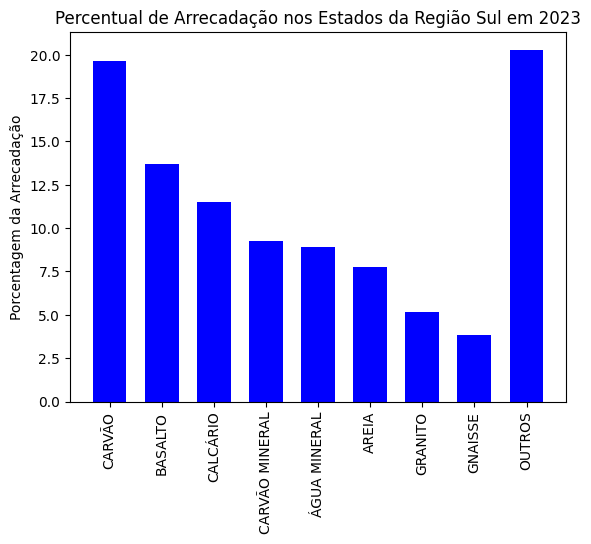

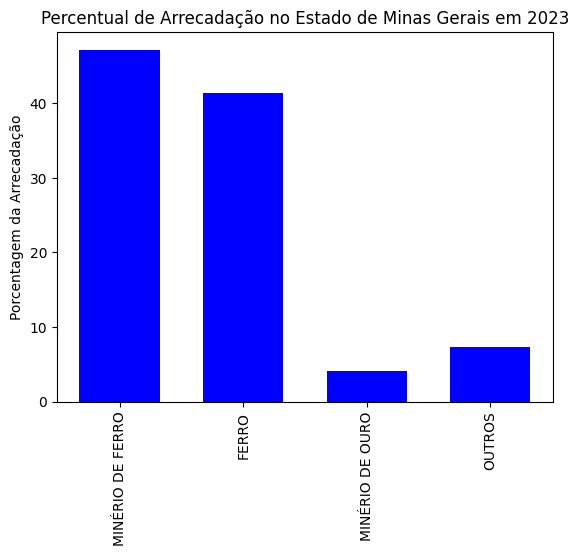

In [ ]:
dados_MG = []
dados_Sul = []

for line in range(len(dados)):
  if dados[line][7] == 'MG':
    dados_MG.append(dados[line])
  elif dados[line][7] == 'PR' or dados[line][7] == 'RS' or dados[line][7] == 'SC':
    dados_Sul.append(dados[line])

dados_MG2023 = []
dados_Sul2023 = []

def Data_2023_Verification(Empty_List, Data_List):
  for line in range(len(Data_List)):
    if int(Data_List[line][0]) == 2023:
      Empty_List.append(Data_List[line])

  return Empty_List

dados_MG2023 = Data_2023_Verification(dados_MG2023, dados_MG)
dados_Sul2023 = Data_2023_Verification(dados_Sul2023, dados_Sul)

total_MG = 0
total_Sul = 0

for line in range(len(dados_MG2023)):
  total_MG += float(dados_MG2023[line][11])

#print(total_MG)

for line in range(len(dados_Sul2023)):
  total_Sul += (float(dados_Sul2023[line][11]))

#print(total_Sul)

minerals_MG = []
minerals_Sul = []

def Mineral_Identification(Minerals_List, Data_List):
  for line in range(len(Data_List)):
    Minerals_List.append(Data_List[line][6])
  Minerals_List = list(dict.fromkeys(Minerals_List))

  return Minerals_List

minerals_MG = Mineral_Identification(minerals_MG, dados_MG2023)
minerals_Sul = Mineral_Identification(minerals_Sul, dados_Sul2023)

def ValorRecolhido_By_Mineral(Data_List, minerals, Empty_Array):
  for mineral in minerals:
    Soma_VR = 0.00
    for line in range(len(Data_List)):
      if Data_List[line][6] == mineral:
        Soma_VR += (float(Data_List[line][11]))
    Empty_Array = np.append(Empty_Array, Soma_VR)

  return Empty_Array

Valor_RecolhidoMG = np.array([])
Valor_RecolhidoSul = np.array([])

Valor_RecolhidoMG = ValorRecolhido_By_Mineral(dados_MG2023, minerals_MG, Valor_RecolhidoMG)
Valor_RecolhidoSul = ValorRecolhido_By_Mineral(dados_Sul2023, minerals_Sul, Valor_RecolhidoSul)

Percentage_VR_MG = np.divide(Valor_RecolhidoMG, total_MG)
Percentage_VR_Sul = np.divide(Valor_RecolhidoSul, total_Sul)

Percentage_VR_MG = np.multiply(Percentage_VR_MG, 100)
Percentage_VR_Sul = np.multiply(Percentage_VR_Sul, 100)

min_MG = {}
for item in range(len(minerals_MG)):
  min_MG[minerals_MG[item]] = Percentage_VR_MG[:][item]

min_Sul = {}
for item in range(len(minerals_Sul)):
  min_Sul[minerals_Sul[item]] = Percentage_VR_Sul[:][item]

relevant_MG = np.array([])
relevant_minerals_MG = []
others_MG = np.array([])
others_minerals_MG = []

relevant_Sul = np.array([])
relevant_minerals_Sul = []
others_Sul = np.array([])
others_minerals_Sul = []

def Relevance_Separation(Minerals_VR_Dict, Relevance_Rate, Percentage_Array, Others_Array, Relevant_Minerals, Other_Minerals):
  for key, values in Minerals_VR_Dict.items():
    if values >= Relevance_Rate:
      Percentage_Array = np.append(Percentage_Array, values)
      Relevant_Minerals.append(key)
    else:
      Others_Array = np.append(Others_Array, values)
      Other_Minerals.append(key)

  return Percentage_Array, Others_Array, Relevant_Minerals, Other_Minerals

relevant_MG, others_MG, relevant_minerals_MG, others_minerals_MG = Relevance_Separation(min_MG, 4, relevant_MG, others_MG, relevant_minerals_MG, others_minerals_MG)
relevant_Sul, others_Sul, relevant_minerals_Sul, others_minerals_Sul = Relevance_Separation(min_Sul, 2.5, relevant_Sul, others_Sul, relevant_minerals_Sul, others_minerals_Sul)

def Other_Minerals(other_minerals):
  soma = 0
  for column in range(len(other_minerals)):
    soma += float(other_minerals[:][column])

  return soma

Percentage_Other_MG = Other_Minerals(others_MG)
Percentage_Other_Sul = Other_Minerals(others_Sul)

final_MG = {}
final_Sul = {}

def Sorting(Empty_Dict, Minerals_List, VR_List):
  for item in range(len(VR_List)):
    Empty_Dict[Minerals_List[item]] = VR_List[item]

  Sorted_Dict = dict(sorted(Empty_Dict.items(), key=lambda item:item[1], reverse = True))

  return Sorted_Dict

final_MG = Sorting(final_MG, relevant_minerals_MG, relevant_MG)
final_Sul = Sorting(final_Sul, relevant_minerals_Sul, relevant_Sul)

def Defining_ValuesXandY(Data_Dict, Empty_Array, Empty_List_Minerals):
  for key, value in Data_Dict.items():
    Empty_Array = np.append(Empty_Array, value)
    Empty_List_Minerals.append(key)

  return Empty_List_Minerals, Empty_Array


Relevant_MG = np.array([])
Relevant_Min_MG = []

Relevant_Sul = np.array([])
Relevant_Min_Sul = []

Relevant_Min_MG, Relevant_MG = Defining_ValuesXandY(final_MG, Relevant_MG, Relevant_Min_MG)
Relevant_Min_Sul, Relevant_Sul = Defining_ValuesXandY(final_Sul, Relevant_Sul, Relevant_Min_Sul)

Relevant_Min_Sul.append('OUTROS')
Relevant_Min_MG.append('OUTROS')
Relevant_MG = np.append(Relevant_MG, Percentage_Other_MG)
Relevant_Sul = np.append(Relevant_Sul, Percentage_Other_Sul)

def Plotting_DataByMineral(Minerals_List, Data_Array, color, title):
  plt.figure()
  plt.title(title)
  for item in range(len(Data_Array)):
    plt.ylabel('Porcentagem da Arrecadação')
    plt.xticks(rotation=90)
    plt.bar(Minerals_List[item], Data_Array[:][item], color=color, width=0.65)

Plotting_DataByMineral(Relevant_Min_Sul, Relevant_Sul, 'b', 'Percentual de Arrecadação nos Estados da Região Sul em 2023')
Plotting_DataByMineral(Relevant_Min_MG, Relevant_MG, 'b', 'Percentual de Arrecadação no Estado de Minas Gerais em 2023')

plt.subplots_adjust(hspace=0.5)

plt.show()